In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
from pacological.fitz import exp, gain
from convenience.numpy import save_hdfz, load_hdfz

-0.941596298411 1.24638293244


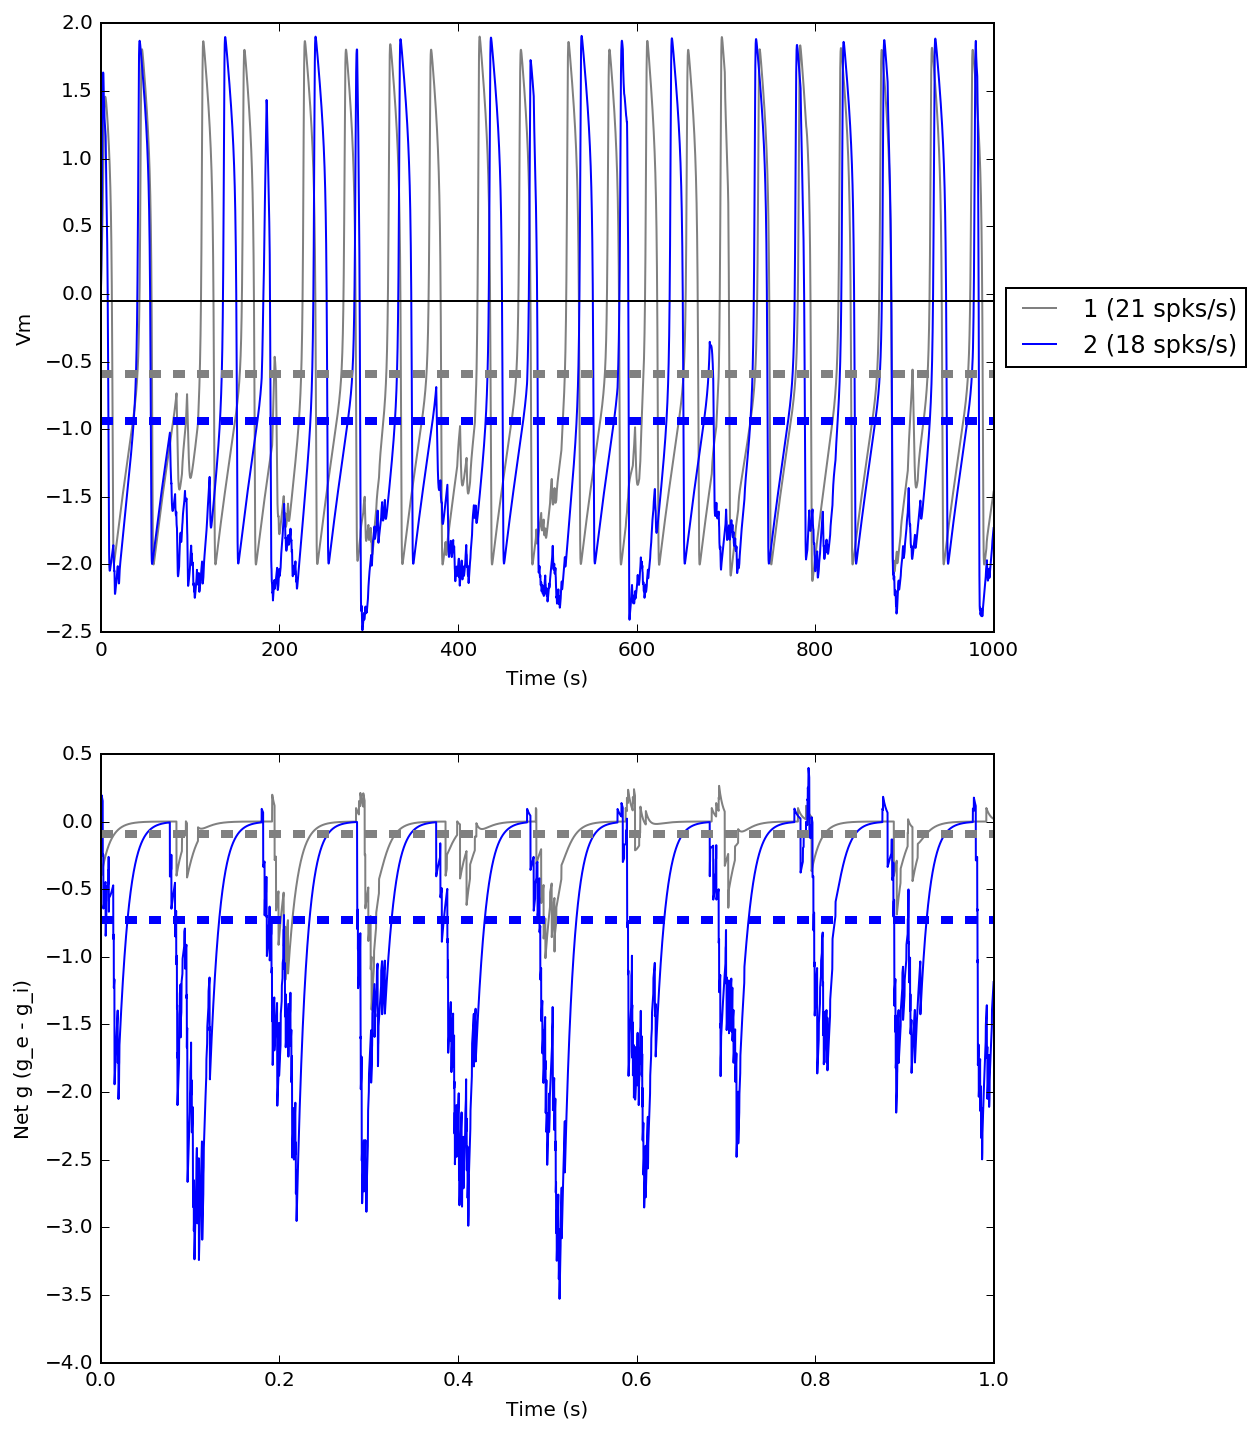

In [3]:
# --
f = 10
I = 0.35
xfactor1 = 1
xfactor2 = 5

# --
t = 1
res1 = exp(t, I, xfactor1, f=f)
res2 = exp(t, I, xfactor2, f=f)

# --
spikes1 = res1['spikes']
traces1 = res1['traces']
spikes2 = res2['spikes']
traces2 = res2['traces']

tot_g1 = traces1.g_e_[0] - traces1.g_i_[0]
M_v1 = np.mean(traces1.v_[0])
SD_v1 = np.std(traces1.v_[0])
rate1 = spikes1.t_[:].shape[0] / t

tot_g2 = traces2.g_e_[0] - traces2.g_i_[0]
M_v2 = np.mean(traces2.v_[0])
SD_v2 = np.std(traces2.v_[0])
rate2 = spikes2.t_[:].shape[0] / t
print M_v2, SD_v2

# --
n_plot = 2
plt.figure(figsize=(8,12))
plt.subplot(n_plot, 1, 1)
plt.plot(traces1.t_*1000, traces1.v_[0], 'grey', label='1 ({} spks/s)'.format(rate1))
plt.plot(traces2.t_*1000, traces2.v_[0], 'blue', label='2 ({} spks/s)'.format(rate2))
plt.axhline(y=-0.054, color='k')
plt.axhline(y=np.mean(traces1.v_[0]), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(traces2.v_[0]), color='blue', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Vm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(n_plot, 1, 2)
plt.plot(traces1.t_, tot_g1, 'grey', label='1')
plt.plot(traces2.t_, tot_g2, 'blue', label='2')
plt.axhline(y=np.mean(tot_g1), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(tot_g2), color='blue', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Net g (g_e - g_i)')

In [ ]:
dat = load_hdfz('../data/exp210/limits_5.hdf5')

rates = dat['rates']
Is = dat['Is']
xfactors = dat['xfactors']

# -
n_plot = 3

plt.figure(figsize=(4,12))

# -
plt.subplot(n_plot, 1, 1)
plt.plot(xfactors, rates.mean(0)[1:], color='k')
plt.axhline(y=np.mean(rates[:,0]), color='k', linestyle='--', linewidth=2)
plt.xlabel("X factor")
plt.ylabel("Mean rate (Hz)")

# -
gains = []
for j in range(rates.shape[1]):
    fitted = np.polyfit(Is, rates[:, j], 2)
    gains.append(fitted[0])

plt.subplot(n_plot, 1, 2)
plt.plot(xfactors, gains[1:], color='k')
plt.axhline(y=gains[0], color='k', linestyle='--', linewidth=2)
plt.xlabel("X factor")
plt.ylabel("Gain")

# -
# Too many, but plot anyway
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights

plt.subplot(n_plot, 1, 3)
plt.plot(Is, rates[:, 0], label='{}X'.format(
        xfactors[0]), color='k', linestyle='--', linewidth=2)
for j, xf in enumerate(xfactors):
    plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
            xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
plt.xlabel("I (mvolt)")
plt.ylabel("Firing rate (Hz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
freqs = range(1, 60, 2)
xfactors = np.arange(1, 6, 1)

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp205/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 2)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))